# **CASO BELLABEAT**

Importamos la libreria Pandas para trabajar con el Dataframe
Leemos el archivo de tipo .csv , lo llamamos 'heart'

In [ ]:
import pandas as pd
heart=pd.read_csv("heartrate_seconds_merged.csv")

Exploramos su contenido

In [ ]:
print(heart)

                 Id                  Time  Value
0        2022484408  4/12/2016 7:21:00 AM     97
1        2022484408  4/12/2016 7:21:05 AM    102
2        2022484408  4/12/2016 7:21:10 AM    105
3        2022484408  4/12/2016 7:21:20 AM    103
4        2022484408  4/12/2016 7:21:25 AM    101
...             ...                   ...    ...
2483653  8877689391  5/12/2016 2:43:53 PM     57
2483654  8877689391  5/12/2016 2:43:58 PM     56
2483655  8877689391  5/12/2016 2:44:03 PM     55
2483656  8877689391  5/12/2016 2:44:18 PM     55
2483657  8877689391  5/12/2016 2:44:28 PM     56

[2483658 rows x 3 columns]


Mostramos la información de sus valores, cantidad de columnas, filas y tipos de datos asociados.

Confirmamos que la columna Time no es reconocida del tipo 'datetime'

In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483658 entries, 0 to 2483657
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Time    object
 2   Value   int64 
dtypes: int64(2), object(1)
memory usage: 56.8+ MB


Con el siguiente código unificamos el formato para todas las filas, para evitar errores cuando se conviertan a 'datetime'

In [ ]:
heart['Time'] = pd.to_datetime(heart['Time']).dt.strftime('%Y/%m/%d %H:%M:%S %p')


In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483658 entries, 0 to 2483657
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Time    object
 2   Value   int64 
dtypes: int64(2), object(1)
memory usage: 56.8+ MB


Con el siguiente código Convertimos de 'object' a 'datetime' con el formato que le proporcionamos.

El parámetro errors='coerce' convierte en NaT (not a Time)los valores que no coincidan con el formato especificado.

In [ ]:
heart['Time'] = pd.to_datetime(heart['Time'], format='%d/%m/%Y %H:%M:%S %p', errors='coerce')

Verificamos que los datos son como nos interesa para empezar el análisis.



*   Id , integer. Número de usuario
*   Time, datetime64. Fecha y hora de registro
*   Value, integer. Valor frecuencia cardíaca





In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483658 entries, 0 to 2483657
Data columns (total 3 columns):
 #   Column  Dtype         
---  ------  -----         
 0   Id      int64         
 1   Time    datetime64[ns]
 2   Value   int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 56.8 MB


In [ ]:
heart

,Id,Time,Value
0,2022484408,2016-04-12 07:21:00,97
1,2022484408,2016-04-12 07:21:05,102
2,2022484408,2016-04-12 07:21:10,105
3,2022484408,2016-04-12 07:21:20,103
4,2022484408,2016-04-12 07:21:25,101
...,...,...,...
2483653,8877689391,2016-05-12 14:43:53,57
2483654,8877689391,2016-05-12 14:43:58,56
2483655,8877689391,2016-05-12 14:44:03,55
2483656,8877689391,2016-05-12 14:44:18,55


Cantidad de usuarios que registraron la Frecuencia Cardíaca.

In [ ]:
heart.Id.nunique()

14

Cantidad de registros por usuario

In [ ]:
heart.Id.value_counts(ascending=True, dropna= False)

Id
2026352035      2490
6775888955     32771
8792009665    122841
7007744171    133592
2347167796    152683
2022484408    154104
6117666160    158899
4558609924    192168
8877689391    228841
5577150313    248560
4388161847    249748
5553957443    255174
6962181067    266326
4020332650    285461
Name: count, dtype: int64

Filtramos los 'Id', eliminamos los que tienen pocos registros

In [ ]:
usuarios = heart['Id'].value_counts()
usuarios_ = usuarios[usuarios>100000].index
heart_ = heart[heart['Id'].isin(usuarios_)]
print (heart_)

                 Id                Time  Value
0        2022484408 2016-04-12 07:21:00     97
1        2022484408 2016-04-12 07:21:05    102
2        2022484408 2016-04-12 07:21:10    105
3        2022484408 2016-04-12 07:21:20    103
4        2022484408 2016-04-12 07:21:25    101
...             ...                 ...    ...
2483653  8877689391 2016-05-12 14:43:53     57
2483654  8877689391 2016-05-12 14:43:58     56
2483655  8877689391 2016-05-12 14:44:03     55
2483656  8877689391 2016-05-12 14:44:18     55
2483657  8877689391 2016-05-12 14:44:28     56

[2448397 rows x 3 columns]


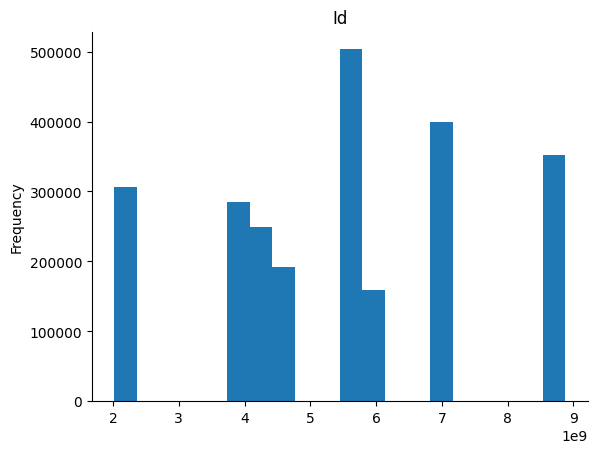

In [ ]:
from matplotlib import pyplot as plt
heart_['Id'].plot(kind='hist', bins=20, title='Id')
plt.gca().spines[['top', 'right',]].set_visible(False)

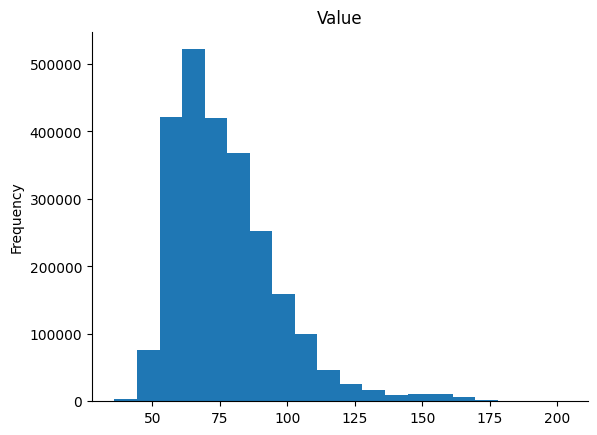

In [ ]:
from matplotlib import pyplot as plt
heart_['Value'].plot(kind='hist', bins=20, title='Value')
plt.gca().spines[['top', 'right',]].set_visible(False)

Aplicamos Funciones de agregación para ver estadísticas del Conjunto

In [ ]:
resultados = heart_.groupby([heart_['Id']]).agg(
   frecuencia_reg = ('Id', 'count'),
   valor_minimo=('Value', 'min'),
   valor_maximo=('Value', 'max'),
   media=('Value', 'mean')
).reset_index()
print(resultados)

            Id  frecuencia_reg  valor_minimo  valor_maximo      media
0   2022484408          154104            38           203  80.236860
1   2347167796          152683            49           195  76.722792
2   4020332650          285461            46           191  82.300577
3   4388161847          249748            39           180  66.132998
4   4558609924          192168            44           199  81.673947
5   5553957443          255174            47           165  68.633093
6   5577150313          248560            36           174  69.564516
7   6117666160          158899            52           189  83.749891
8   6962181067          266326            47           184  77.724045
9   7007744171          133592            54           166  91.123795
10  8792009665          122841            43           158  72.487484
11  8877689391          228841            46           180  83.611184


Lo hacemos más preciso. Queremos ver las estadísticas por cada día y por cada usuario

In [ ]:
#extraigo la fecha de la columna 'Time', creando otra columna 'Date'
heart_['Date'] = heart_['Time'].dt.date

<ipython-input-32-5426ad86709d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_['Date'] = heart_['Time'].dt.date


In [ ]:
heart_

,Id,Time,Value,Date
0,2022484408,2016-04-12 07:21:00,97,2016-04-12
1,2022484408,2016-04-12 07:21:05,102,2016-04-12
2,2022484408,2016-04-12 07:21:10,105,2016-04-12
3,2022484408,2016-04-12 07:21:20,103,2016-04-12
4,2022484408,2016-04-12 07:21:25,101,2016-04-12
...,...,...,...,...
2483653,8877689391,2016-05-12 14:43:53,57,2016-05-12
2483654,8877689391,2016-05-12 14:43:58,56,2016-05-12
2483655,8877689391,2016-05-12 14:44:03,55,2016-05-12
2483656,8877689391,2016-05-12 14:44:18,55,2016-05-12


Ahora mostramos resultados

In [ ]:
resultados1 = heart_.groupby(['Id','Date']).agg(
   valor_minimo=('Value', 'min'),
   valor_maximo=('Value', 'max'),
   media= ('Value', 'mean')
).reset_index()
print(resultados1)

             Id        Date  valor_minimo  valor_maximo      media
0    2022484408  2016-04-12            52           134  75.804177
1    2022484408  2016-04-13            51           156  80.337584
2    2022484408  2016-04-14            50           127  72.628597
3    2022484408  2016-04-15            53           189  80.437382
4    2022484408  2016-04-16            49           136  75.960547
..          ...         ...           ...           ...        ...
307  8877689391  2016-05-08            54           137  72.550523
308  8877689391  2016-05-09            51           176  89.615738
309  8877689391  2016-05-10            50           141  71.544377
310  8877689391  2016-05-11            48           180  89.149122
311  8877689391  2016-05-12            53           122  71.087439

[312 rows x 5 columns]


In [ ]:
resultados1

,Id,Date,valor_minimo,valor_maximo,media
0,2022484408,2016-04-12,52,134,75.804177
1,2022484408,2016-04-13,51,156,80.337584
2,2022484408,2016-04-14,50,127,72.628597
3,2022484408,2016-04-15,53,189,80.437382
4,2022484408,2016-04-16,49,136,75.960547
...,...,...,...,...,...
307,8877689391,2016-05-08,54,137,72.550523
308,8877689391,2016-05-09,51,176,89.615738
309,8877689391,2016-05-10,50,141,71.544377
310,8877689391,2016-05-11,48,180,89.149122


from matplotlib import pyplot as plt
resultados1['Id'].plot(kind='hist', bins=20, title='Id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
resultados1['valor_minimo'].plot(kind='hist', bins=20, title='valor_minimo')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
resultados1['valor_maximo'].plot(kind='hist', bins=20, title='valor_maximo')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
resultados1['media'].plot(kind='hist', bins=20, title='media')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
resultados1.plot(kind='scatter', x='Id', y='valor_minimo', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
resultados1.plot(kind='scatter', x='valor_minimo', y='valor_maximo', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
resultados1.plot(kind='scatter', x='valor_maximo', y='media', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Id']
  ys = series['valor_minimo']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = resultados1.sort_values('Id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Id')
_ = plt.ylabel('valor_minimo')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Id']
  ys = series['valor_maximo']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = resultados1.sort_values('Id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Id')
_ = plt.ylabel('valor_maximo')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Id']
  ys = series['media']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = resultados1.sort_values('Id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Id')
_ = plt.ylabel('media')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Id'}, axis=1)
              .sort_values('Id', ascending=True))
  xs = counted['Id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = resultados1.sort_values('Id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
resultados1['Id'].plot(kind='line', figsize=(8, 4), title='Id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
resultados1['valor_minimo'].plot(kind='line', figsize=(8, 4), title='valor_minimo')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
resultados1['valor_maximo'].plot(kind='line', figsize=(8, 4), title='valor_maximo')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
resultados1['media'].plot(kind='line', figsize=(8, 4), title='media')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
list (resultados1.groupby('Id'))

[(2022484408,
              Id        Date  valor_minimo  valor_maximo      media
  0   2022484408  2016-04-12            52           134  75.804177
  1   2022484408  2016-04-13            51           156  80.337584
  2   2022484408  2016-04-14            50           127  72.628597
  3   2022484408  2016-04-15            53           189  80.437382
  4   2022484408  2016-04-16            49           136  75.960547
  5   2022484408  2016-04-17            52           161  83.917138
  6   2022484408  2016-04-18            54           153  82.712829
  7   2022484408  2016-04-19            54           162  81.954000
  8   2022484408  2016-04-20            50           166  83.444040
  9   2022484408  2016-04-21            53           203  86.374820
  10  2022484408  2016-04-22            52           153  80.125444
  11  2022484408  2016-04-23            50           109  71.755625
  12  2022484408  2016-04-24            53           163  82.421240
  13  2022484408  2016-04-25      

Convierto los resultados obtenidos en un archivo CSV para importar a PowerBI

In [ ]:
df_results = pd.DataFrame(resultados1)
df_results.to_csv('heartrate_etlPython.csv')